# Lab 1 MSDS 7331 Section 404

## Johnson Ekedum, Ekaterina Pirogova, Victor Yim

### 9/17/2017


### Business Understanding

Diabetes is a disease in which the body’s ability to produce or respond to the hormone insulin is impaired.  This causes the elevation of glucose level in the blood and urine.  Complication from diabetes can lead to further cardiovascular disease, nerve damage, kidney failure, eye damage and many others.   Researchers and doctors have been working on prevention and care for decades.  This project is an attempt to leverage the data collected from 1999 to 2008 on over one hundred thousand patient from clinical care at 130 hospitals.  50 features were collected on the patients and the hospital outcome.  


### Data Understanding

#### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

For this analysis, we leveraged a dataset from UCI Machine Learning Repository.  https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008
The dataset contains over 100,000 records of patients' visit to over 130 hospitals.  There are 50 variables in the datasets.  Reference table below is the summary description of the variables obtained from BioMed Research International Journal publication.  https://www.hindawi.com/journals/bmri/2014/781670/

Data Description:                                                                                                                                  

**Feature name**|**Type**|**Description and values**
:-----:|:-----:|:-----:
Encounter ID|Numeric|Unique identifier of an encounter
Patient number|Numeric|Unique identifier of a patient
Race|Nominal|Values: Caucasian / Asian / African American / Hispanic / and other
Gender|Nominal|Values: male / female / and unknown/invalid
Age|Nominal|Grouped in 10-year intervals: 0 - 10)  10 - 20) / … / 90 - 100)
Weight|Numeric|Weight in pounds.
Admission type|Nominal|Integer identifier corresponding to 9 distinct values. For example emergency / urgent / elective / newborn / and not available
Discharge disposition|Nominal|Integer identifier corresponding to 29 distinct values. For example discharged to home / expired / and not available
Admission source|Nominal|Integer identifier corresponding to 21 distinct values. For example physician referral / emergency room / and transfer from a hospital
Time in hospital|Numeric|Integer number of days between admission and discharge
Payer code|Nominal|Integer identifier corresponding to 23 distinct values. For example Blue Cross/Blue Shield / Medicare / and self-pay
Medical specialty|Nominal|Integer identifier of a specialty of the admitting physician / corresponding to 84 distinct values / for example / cardiology / internal medicine / family/general practice / and surgeon
Number of lab procedures|Numeric|Number of lab tests performed during the encounter
Number of procedures|Numeric|Number of procedures (other than lab tests) performed during the encounter
Number of medications|Numeric|Number of distinct generic names administered during the encounter
Number of outpatient visits|Numeric|Number of outpatient visits of the patient in the year preceding the encounter
Number of emergency visits|Numeric|Number of emergency visits of the patient in the year preceding the encounter
Number of inpatient visits|Numeric|Number of inpatient visits of the patient in the year preceding the encounter
Diagnosis 1|Nominal|The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
Diagnosis 2|Nominal|Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
Diagnosis 3|Nominal|Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
Number of diagnoses|Numeric|Number of diagnoses entered to the system
Glucose serum test result|Nominal|Indicates the range of the result or if the test was not taken. Values: “>200 /” “>300 /” “normal /” and “none” if not measured
A1c test result|Nominal|Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8% / “>7” if the result was greater than 7% but less than 8% / “normal” if the result was less than 7% / and “none” if not measured.
Change of medications|Nominal|Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
Diabetes medications|Nominal|Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
24 features for medications|Nominal|For the generic names: metformin / repaglinide / nateglinide / chlorpropamide / glimepiride / acetohexamide / glipizide / glyburide / tolbutamide / pioglitazone / rosiglitazone / acarbose / miglitol / troglitazone / tolazamide / examide / sitagliptin / insulin / glyburide-metformin / glipizide-metformin / glimepiride-pioglitazone / metformin-rosiglitazone / and metformin-pioglitazone / the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter / “down” if the dosage was decreased / “steady” if the dosage did not change / and “no” if the drug was not prescribed
Readmitted|Nominal|Days to inpatient readmission. Values: “30” if the patient was readmitted in more than 30 days / and “No” for no record of readmission.


Our team performed further validation to ensure descriptions match to the dataset.  A few variances were detected and adjustment was made.  


====================================================================================================================



In [101]:
# import data and all referenced libraries and set graph and chart style for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import ascii_letters
import warnings
import seaborn as sns
import matplotlib as mpl
import pylab
from sklearn.decomposition import PCA
from sklearn import datasets as ds

%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "palettes")))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

diab = pd.read_csv('C:/Users/Victor Yim/Downloads/diabetic_data.csv')

# Replace missing values to NaN
diab = diab.replace(to_replace='?',value=np.nan)

We first reviewed each of the variable visually to gain high level unnderstanding of the data as well as doing out prelimary inspection on data quality

In [102]:
diab.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.


##### Missing values

The dataset contains 101,766 records.  Missing values vary greatly among variables. 

**Variable**|**Missing Values**|**% of Missing Values**
-----|-----|-----
race|2273|2.23%
gender (unknown)|3|0.003%
weight|98567|96.85%
payer\_code|40256|39.56%
medical\_specialty|49949|49.08%
diag\_2|358|0.35%
diag\_3|1423|1.40%

Only 7 variables above contain missing values.  All the other variables have complete records.  In regards to gender, while they are not labeled as missing value, the "unknown/Invalid" population nonetheless provide challenges to the analysis.  Therefore, we treated the 3 records as missing values and used most_frequent levels to replace these values.  

On the race variable, we first tried using linear discriminate analysis in SAS
<img src="https://github.com/jdpersona/Data-Mining-Team-Projects/blob/master/LDA.JPG?raw=true" />


The result however was heavily tilted toward African.  Comparing this to the distribution of the dataset, we did not feel that was accurately imputting the missing race variable.  After considering our options, we decided to use sci-kit learn imputer function using most_frequenty strategy to impute these missing variables.

In [103]:
diab["race"] = pd.Categorical(diab.race)
diab["code_race"] = diab.race.cat.codes
diab.ix[diab['code_race']== -1, ["code_race"]]=np.nan

from sklearn.preprocessing import Imputer
import numpy as np
imp=Imputer(missing_values="NaN", strategy="most_frequent")
imp.fit(diab[["code_race"]])
diab["code_race"]=imp.transform(diab[["code_race"]]).ravel()
###Imputation gave 2: therefore, we'll replace with caucasians
diab.ix[diab['race'].isnull(),["race"]]="Caucasian"

For the gender variable, we took the same approach.  As a result, we updated the unknown values to Females

In [104]:
diab['gender'] = diab['gender'].replace(['Unknown/Invalid', 'Female'])

For diag_2 (secondary diagnosis) and diag_3 (additional secondary diagnosis), it is highly possible for patient to have only diag_1 (primary diagnosis).  Therefore, any missing values can be treated as "not applicable".  However, there are 79 records with diag_3 but without diag_2.  Upon further analysis, we decided to treat those 79 diag_3 records as missed label from diag_2.

Due to high number of missing values in payer_code and medical_speciality, we decided to drop these variables from our model.

In [105]:
diab.drop(["payer_code"],axis=1, inplace = True)
diab.drop(["medical_specialty"],axis=1, inplace = True)

For weight varable, while there are over 96% of missing values, one theory was that these patients may not be required weight in for the symptom of procedure.  Therefore, we decide to keep this variable for the initial data exploration phase.  A new variable was created to denote "weight_measured"

In [106]:
#weigth is coded as meausrement taken or not
import numpy as np
import pandas as pd
diab['weight_status']=np.nan #empty column
diab['weight_status'][diab['weight'].isnull()] ="Not measured"
diab['weight_status'][diab['weight'].notnull()] ="Measured"

##### Duplicate Data

Since each of the records within this dataset is intended to identify each visit, there are no duplicate records among this dataset.  However, if a patient has multiple visits it would have separate records denote each visit.  Upon further evaluation, there are 16,773 patients with multiple visits.  

**Number of visits**|**Count of Patients**
:-----:|:-----:
40|1
28|1
23|3
22|2
21|1
20|6
19|3
18|6
17|3
16|4
15|9
14|5
13|14
12|19
11|20
10|42
9|70
8|111
7|207
6|346
5|717
4|1421
3|3328
2|10434

Pending the type of future analysis, unique patient records may be more suitable for prediction.   

##### Outliers
While majority of variables have no missing value, the distribution of values greatly differ.  For example, number_outpatient, number_emergency and number_inpatient all have greater than 90% of values as 0.  
Variable number_diagnoses distribution drops off at 9 with only 114 records with value > = 10.  Further evaluation maybe need to confirm data accuracy.

====================================================================================================================

There are also 2 categorical variables with only 1 level which provide no analytic value.  Both variables were dropped from the dataset.

In [107]:
#examide and citoglipton medications nobody used. Can drop variables
diab.drop(["examide"],axis=1, inplace = True)
diab.drop(["citoglipton"],axis=1, inplace = True)


#### Are there other features that could be added to the data or created from existing features? Which ones? 

After exploring the 50 variables, we tried to evaluate the  

====================================================================================================================

#### data quality
We detected a few data discrepancy in our data exploration phase.  

1)	Number of medications - while the data description explains there should be 24 medications, only 23 medications were contained in the dataset.

2)	Change – there are 2 levels (Ch/No) to denote if the prescription was changed from the visit.  However, the “Ch” records do not match the actual records of the medication in some cases.

3)	diag_2/diag_3 – there are patients with diag_3 values without diag_2.
 


### Data Preparation



The dataset mainly contains categorial data and many with high numbers of levels. In the case of diag_1, diag_2 and diag_3, we were able to use the coding description to combine them into 10 groups of dianogsiss.  


In [108]:
# convert columns to categorial variables
categ_features = ['race','gender','age','weight','payer_code','medical_specialty','diag_1','diag_2','diag_3'
                  ,'max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide'
                  ,'glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone'
                  ,'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton'
                  ,'insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone'
                  ,'metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed','readmitted'
                  ,'medical_specialty']

# convert columns to continuous features variables
continuous_features = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications'
                       ,'number_outpatient','number_emergency','number_inpatient','number_diagnoses']

# convert columns to ID features variables
id_features = ['encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id']


#create new column for readmitted_Group based.  Anyone readmitted = 1 else = 0
diab['readmitted_Group'] = 0
diab['readmitted_Group'][diab['readmitted']==">30"] = 1
diab['readmitted_Group'][diab['readmitted']=="<30"] = 1

diag_num=["diag_1","diag_2","diag_3"]
#replace diagnosis containing E and V as -1 and -2
diab[diag_num] = diab[diag_num].replace({'E':'-1'}, regex=True)
diab[diag_num] = diab[diag_num].replace({'V':'-2'}, regex=True)

diab[diag_num] = diab[diag_num].astype(np.float)
#bin by diagnosis type
pd.options.mode.chained_assignment = None #supress warnings
#diagnosis 1
diab['diag_1_cat']=np.nan #empty column
diab['diag_1_cat'][(diab['diag_1']>=-2000)&(diab['diag_1']<1)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=280)&(diab['diag_1']<=389)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=630)&(diab['diag_1']<=679)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=740)&(diab['diag_1']<=759)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=1)&(diab['diag_1']<250)] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=251)&(diab['diag_1']<280)] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=790)&(diab['diag_1']<=799)|((diab['diag_1']==780))|((diab['diag_1']==781))
                  |((diab['diag_1']==784))] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=680)&(diab['diag_1']<=709)|((diab['diag_1']==782))]="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=250)&(diab['diag_1']<251)] ="Diabeties"
diab['diag_1_cat'][(diab['diag_1']>=390)&(diab['diag_1']<=459)|((diab['diag_1']==785))] ="Circulatory"
diab['diag_1_cat'][(diab['diag_1']>=460)&(diab['diag_1']<=519)|((diab['diag_1']==786))] ="Respiratory"
diab['diag_1_cat'][(diab['diag_1']>=520)&(diab['diag_1']<=579)|((diab['diag_1']==787))] ="Digestive"
diab['diag_1_cat'][(diab['diag_1']>=800)&(diab['diag_1']<=999)] ="Injury"
diab['diag_1_cat'][(diab['diag_1']>=710)&(diab['diag_1']<=739)] ="Musculoskeletal"
diab['diag_1_cat'][(diab['diag_1']>=580)&(diab['diag_1']<=629)|((diab['diag_1']==788))] ="Genitourinary"
diab['diag_1_cat'][diab['diag_1'].isnull()] ="No diagnosis"
#diagnosis 2
diab['diag_2_cat']=np.nan #empty column
diab['diag_2_cat'][(diab['diag_2']>=-2000)&(diab['diag_2']<1)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=280)&(diab['diag_2']<=389)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=630)&(diab['diag_2']<=679)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=740)&(diab['diag_2']<=759)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=1)&(diab['diag_2']<250)] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=251)&(diab['diag_2']<280)] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=790)&(diab['diag_2']<=799)|((diab['diag_2']==780))|((diab['diag_2']==781))
                  |((diab['diag_2']==784))] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=680)&(diab['diag_2']<=709)|((diab['diag_2']==782))]="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=250)&(diab['diag_2']<251)] ="Diabeties"
diab['diag_2_cat'][(diab['diag_2']>=390)&(diab['diag_2']<=459)|((diab['diag_2']==785))] ="Circulatory"
diab['diag_2_cat'][(diab['diag_2']>=460)&(diab['diag_2']<=519)|((diab['diag_2']==786))] ="Respiratory"
diab['diag_2_cat'][(diab['diag_2']>=520)&(diab['diag_2']<=579)|((diab['diag_2']==787))] ="Digestive"
diab['diag_2_cat'][(diab['diag_2']>=800)&(diab['diag_2']<=999)] ="Injury"
diab['diag_2_cat'][(diab['diag_2']>=710)&(diab['diag_2']<=739)] ="Musculoskeletal"
diab['diag_2_cat'][(diab['diag_2']>=580)&(diab['diag_2']<=629)|((diab['diag_2']==788))] ="Genitourinary"
diab['diag_2_cat'][diab['diag_2'].isnull()] ="No diagnosis"
#diagnosis 3
diab['diag_3_cat']=np.nan #empty column
diab['diag_3_cat'][(diab['diag_3']>=-2000)&(diab['diag_3']<1)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=280)&(diab['diag_3']<=389)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=630)&(diab['diag_3']<=679)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=740)&(diab['diag_3']<=759)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=1)&(diab['diag_3']<250)] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=251)&(diab['diag_3']<280)] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=790)&(diab['diag_3']<=799)|((diab['diag_3']==780))|((diab['diag_3']==781))
                  |((diab['diag_3']==784))] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=680)&(diab['diag_3']<=709)|((diab['diag_3']==782))]="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=250)&(diab['diag_3']<251)] ="Diabeties"
diab['diag_3_cat'][(diab['diag_3']>=390)&(diab['diag_3']<=459)|((diab['diag_3']==785))] ="Circulatory"
diab['diag_3_cat'][(diab['diag_3']>=460)&(diab['diag_3']<=519)|((diab['diag_3']==786))] ="Respiratory"
diab['diag_3_cat'][(diab['diag_3']>=520)&(diab['diag_3']<=579)|((diab['diag_3']==787))] ="Digestive"
diab['diag_3_cat'][(diab['diag_3']>=800)&(diab['diag_3']<=999)] ="Injury"
diab['diag_3_cat'][(diab['diag_3']>=710)&(diab['diag_3']<=739)] ="Musculoskeletal"
diab['diag_3_cat'][(diab['diag_3']>=580)&(diab['diag_3']<=629)|((diab['diag_3']==788))] ="Genitourinary"
diab['diag_3_cat'][diab['diag_3'].isnull()] ="No diagnosis"


#returning diag_1, diag_2, diag_3 to the previous state.
diag_num=["diag_1","diag_2","diag_3"]
#correct type
diab[diag_num] = diab[diag_num].astype("str")
#replace diagnosis containing E and V as -1 and -2
diab[diag_num] = diab[diag_num].replace({'-2':'V'}, regex=True)
diab[diag_num] = diab[diag_num].replace({'-1':'E'}, regex=True)




# insert dictionary
admission_type_id_dict = {"1" : "Emergency",
"2" : "Urgent",
"3" : "Elective",
"4" : "Newborn",
"5" : "Not Available",
"6" : "NULL",
"7" : "Trauma Center",
"8" : "Not Mapped"}


discharge_disposition_id_dict= {"1" : "Discharged to home",
"2" : "Discharged/transferred to another short term hospital",
"3" : "Discharged/transferred to SNF",
"4" : "Discharged/transferred to ICF",
"5" : "Discharged/transferred to another type of inpatient care institution",
"6" : "Discharged/transferred to home with home health service",
"7" : "Left AMA",
"8" : "Discharged/transferred to home under care of Home IV provider",
"9" : "Admitted as an inpatient to this hospital",
"10" : "Neonate discharged to another hospital for neonatal aftercare",
"11" : "Expired",
"12" : "Still patient or expected to return for outpatient services",
"13" : "Hospice / home",
"14" : "Hospice / medical facility",
"15" : "Discharged/transferred within this institution to Medicare approved swing bed",
"16" : "Discharged/transferred/referred another institution for outpatient services",
"17" : "Discharged/transferred/referred to this institution for outpatient services",
"18" : "NULL",
"19" : "Expired at home. Medicaid only, hospice.",
"20" : "Expired in a medical facility. Medicaid only, hospice.",
"21" : "Expired, place unknown. Medicaid only, hospice.",
"22" : "Discharged/transferred to another rehab fac including rehab units of a hospital .",
"23" : "Discharged/transferred to a long term care hospital.",
"24" : "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
"25" : "Not Mapped",
"26" : "Unknown/Invalid",
"30" : "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere",
"27" : "Discharged/transferred to a federal health care facility.",
"28" : "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
"29" : "Discharged/transferred to a Critical Access Hospital (CAH)."}


discharge_disposition_id_dict= {"1" : " Physician Referral",
"2" : "Clinic Referral",
"3" : "HMO Referral",
"4" : "Transfer from a hospital",
"5" : " Transfer from a Skilled Nursing Facility (SNF)",
"6" : " Transfer from another health care facility",
"7" : " Emergency Room",
"8" : " Court/Law Enforcement",
"9" : " Not Available",
"10" : " Transfer from critial access hospital",
"11" : "Normal Delivery",
"12" : " Premature Delivery",
"13" : " Sick Baby",
"14" : " Extramural Birth",
"15" : "Not Available",
"17" : "NULL",
"18" : " Transfer From Another Home Health Agency",
"19" : "Readmission to Same Home Health Agency",
"20" : " Not Mapped",
"21" : "Unknown/Invalid",
"22" : " Transfer from hospital inpt/same fac reslt in a sep claim",
"23" : " Born inside this hospital",
"24" : " Born outside this hospital",
"25" : " Transfer from Ambulatory Surgery Center",
"26" : "Transfer from Hospice"}

### Visualize appropriate statistics

Using various plotting techniques, we attempt to understand the distribution of the different variables.
First, we tried to combined the race and gender variable and reviewed the result in chart

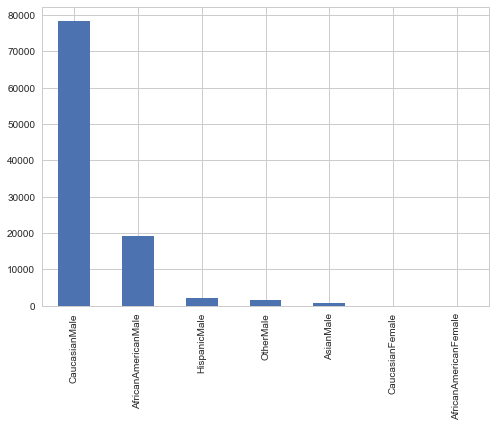

In [109]:
diab['race_gender'] = diab['race']+diab['gender']
pd.crosstab(diab.race_gender, diab.readmitted).apply(lambda r: r/r.sum(), axis=1)
diab['race_gender'].value_counts().plot(kind='bar')


We attempted the same methodology with age and gender variables

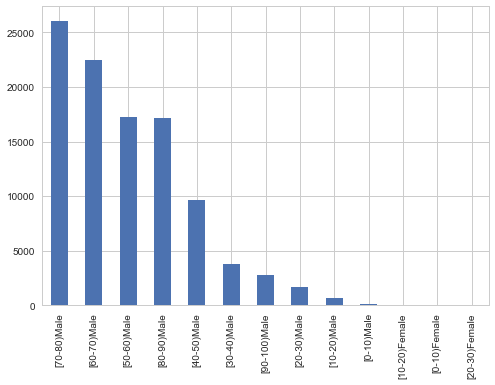

In [110]:
diab['age_gender'] = diab['age']+diab['gender']
pd.crosstab(diab.age_gender, diab.readmitted).apply(lambda r: r/r.sum(), axis=1)
diab['age_gender'].value_counts().plot(kind='bar')

We did not detect anomaly in the distribution from the above.  We did however understand the age play significant factor in the hospital visits

We then leverage boxplot to review the distribution among some of the numeric variables

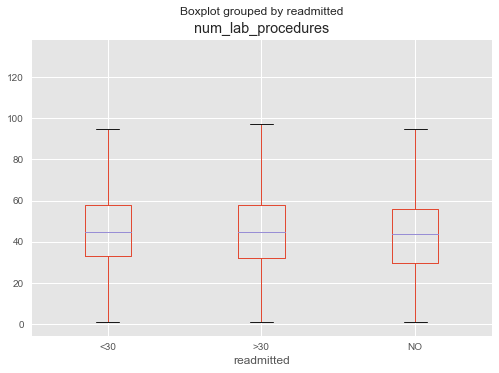

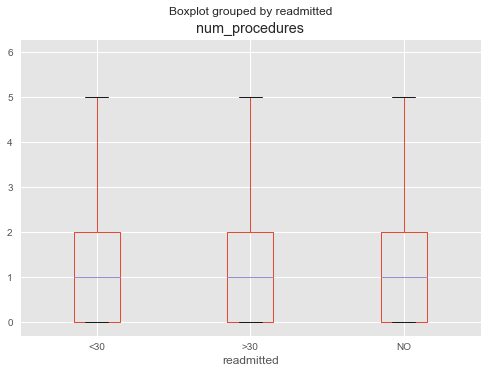

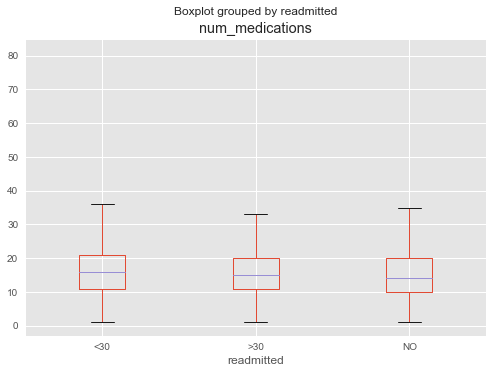

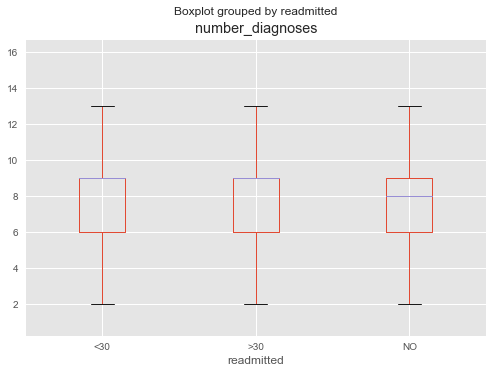

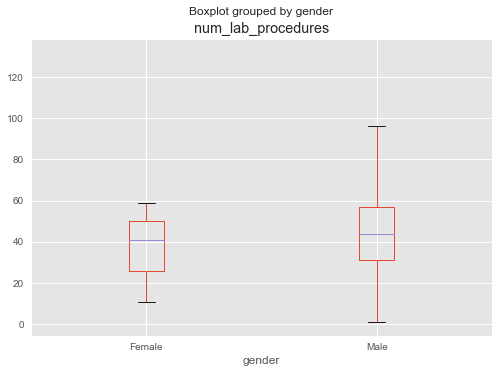

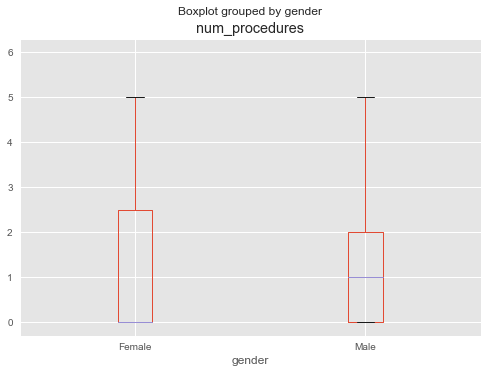

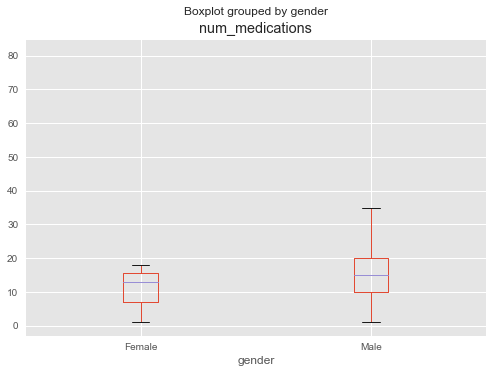

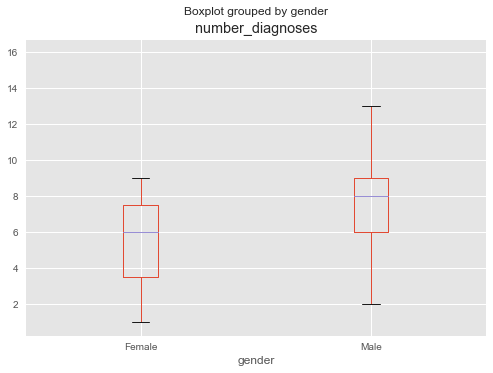

In [114]:
pd.crosstab(diab.readmitted, diab.change).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(diab.diabetesMed, diab.change).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(diab.admission_source_id, diab.readmitted).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(diab.readmitted, diab.num_lab_procedures).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(diab.readmitted, diab.A1Cresult).apply(lambda r: r/r.sum(), axis=1)


ax = diab.boxplot(column='num_lab_procedures', by = 'readmitted')
ax = diab.boxplot(column='num_procedures', by = 'readmitted')
ax = diab.boxplot(column='num_medications', by = 'readmitted')
ax = diab.boxplot(column='number_diagnoses', by = 'readmitted')

ax = diab.boxplot(column='num_lab_procedures', by = 'gender')
ax = diab.boxplot(column='num_procedures', by = 'gender')
ax = diab.boxplot(column='num_medications', by = 'gender')
ax = diab.boxplot(column='number_diagnoses', by = 'gender')
# ax.set_yscale('log')

We found that gender by lab procedures have much different range even the mean are close.  This will be taken into consideration for the next level of analysis. 


Histograms were used to review the individual medication. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025819D8BF28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025819B6B7B8>]], dtype=object)

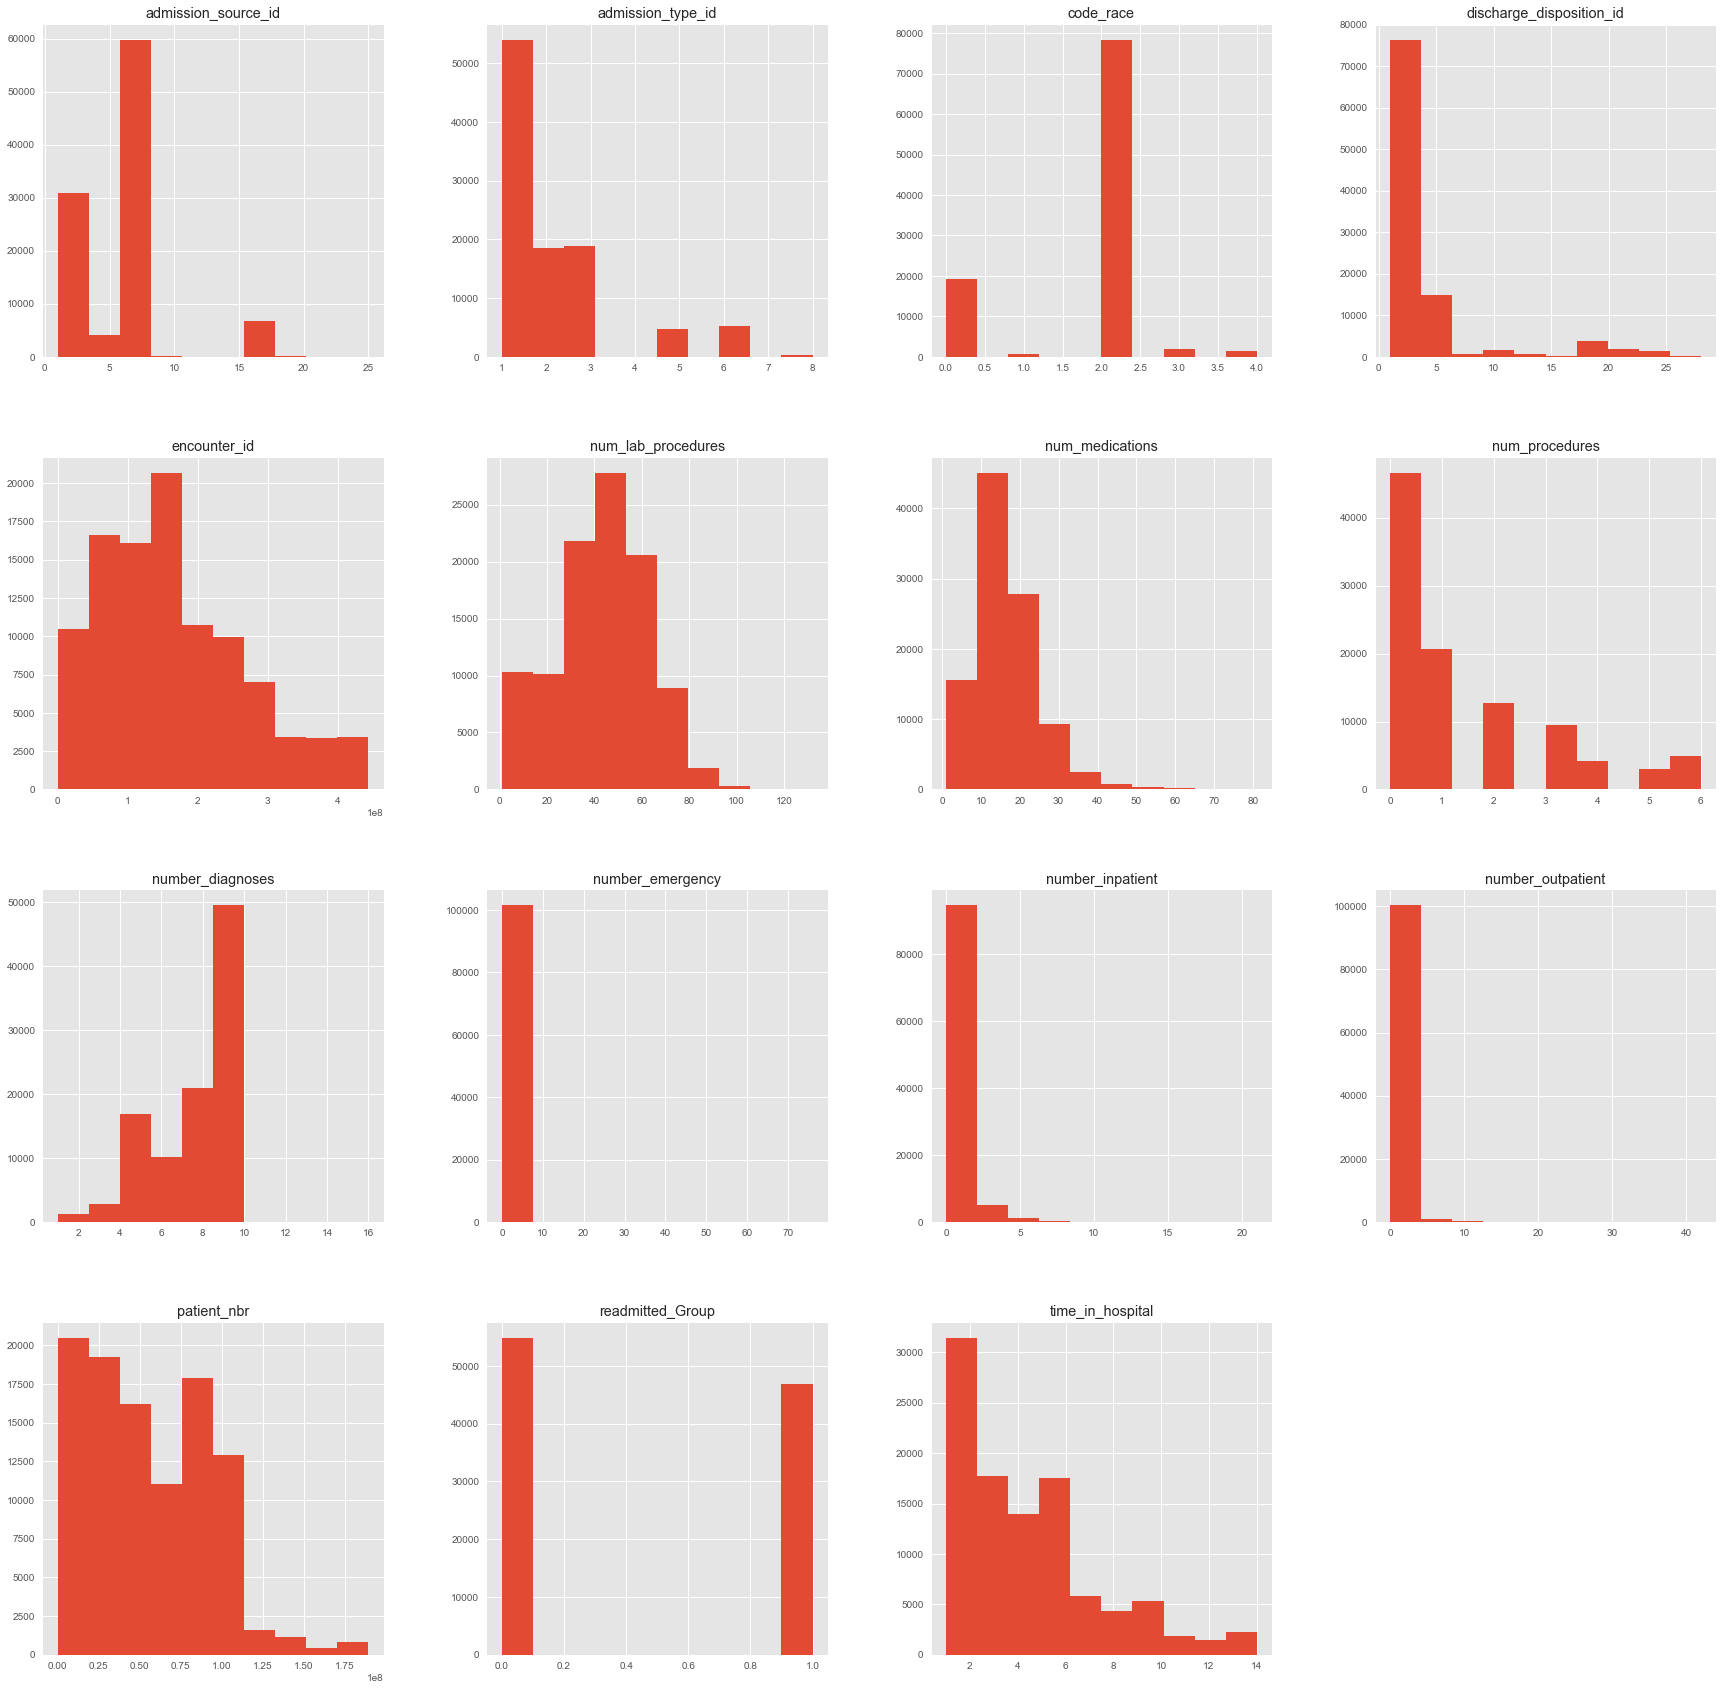

In [117]:
diab_hist =pd.DataFrame({'metformin':np.random.randn(100)
                 ,'repaglinide':np.random.randn(100)
                 ,'nateglinide':np.random.randn(100)
                 ,'chlorpropamide':np.random.randn(100)
                 ,'glimepiride':np.random.randn(100)
                 ,'acetohexamide':np.random.randn(100)
                 ,'glipizide':np.random.randn(100)
                 ,'glyburide':np.random.randn(100)
                 ,'tolbutamide':np.random.randn(100)
                  ,'pioglitazone':np.random.randn(100)
                  ,'rosiglitazone':np.random.randn(100)
                  ,'acarbose':np.random.randn(100)
                  ,'miglitol':np.random.randn(100)
                  ,'troglitazone':np.random.randn(100)
                  ,'tolazamide':np.random.randn(100)
                  ,'examide':np.random.randn(100)
                  ,'citoglipton':np.random.randn(100)
                  ,'insulin':np.random.randn(100)
                  ,'glyburide-metformin':np.random.randn(100)
                  ,'glipizide-metformin':np.random.randn(100)
                  ,'glimepiride-pioglitazone':np.random.randn(100)
                  ,'metformin-rosiglitazone':np.random.randn(100)
                  ,'metformin-pioglitazone':np.random.randn(100)
                 })
diab.hist(figsize=(30,30))


#### Are there other features that could be added to the data or created from existing features? Which ones?
with the high number of missing values in weight, we theorized that this could be a result of that it is not a medical requirement for those patient.  We imputted a new column "weight_status" with all "?" == "Not measured" and all else as "Measured".

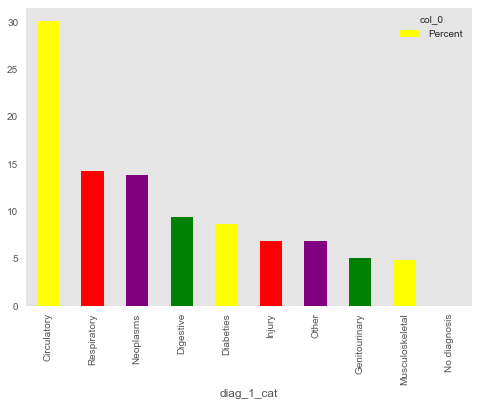

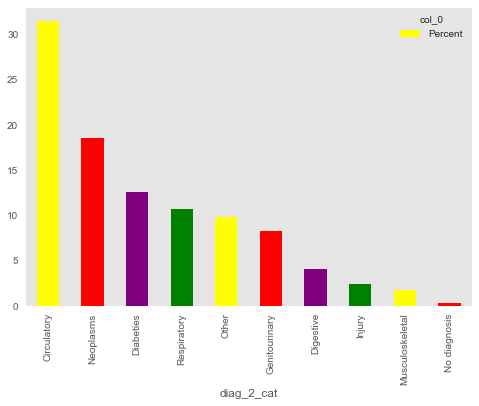

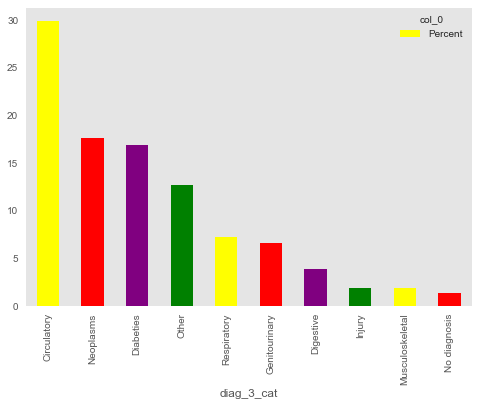

In [118]:
#diagnosis 1 visualization
diag1_counts = pd.crosstab(index = diab["diag_1_cat"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
diag1_counts.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
#diagnosis 2 visualization
diag2_counts = pd.crosstab(index = diab["diag_2_cat"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
diag2_counts.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
#diagnosis 3 visualization
diag3_counts = pd.crosstab(index = diab["diag_3_cat"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
diag3_counts.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)

Percentage of weight_status


col_0,Percent
weight_status,
Measured,3.14
Not measured,96.86


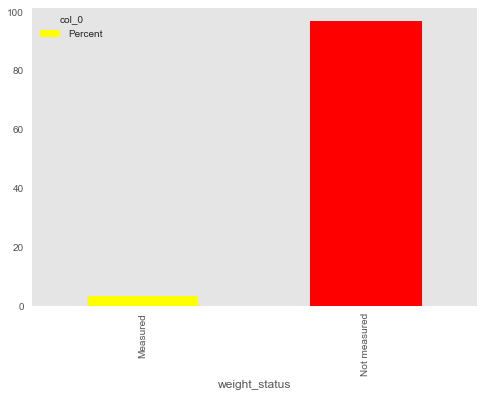

In [119]:
#weigth is coded as meausrement taken or not
diab['weight_status']=np.nan #empty column
diab['weight_status'][diab['weight'].isnull()] ="Not measured"
diab['weight_status'][diab['weight'].notnull()] ="Measured"
weigth_status_percentage = pd.crosstab(index = diab['weight_status'], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0)
weigth_status_percentage.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
print("Percentage of weight_status")
round(weigth_status_percentage,2)

readmitted                 <30    >30     NO
A1Cresult weight_status                     
False     False          11.43  34.65  53.92
          True           11.33  47.91  40.76
True      False           9.85  33.93  56.23
          True            9.83  41.62  48.55

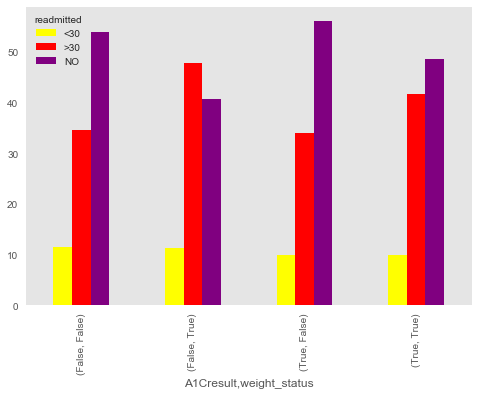

In [120]:
#plot weight_status where A1Cresult was measured
#Left plot weight not measured. Right plot weight measured")
weigth_status_percents = pd.crosstab([diab['A1Cresult']!="None",diab['weight_status']!="Not measured"], 
                              diab.readmitted).apply(lambda r: r/r.sum()*100, axis=1)
weigth_status_percents.plot(kind='bar', stacked=False, color=['yellow','red','purple'], grid=False)
round(weigth_status_percents,2)
#true, true - measured A1C and weight
#false,false - not measured A1C and weight

col_0,Percent
A1Cresult,
>7,3.745848
>8,8.073423
None,83.277322
Norm,4.903406


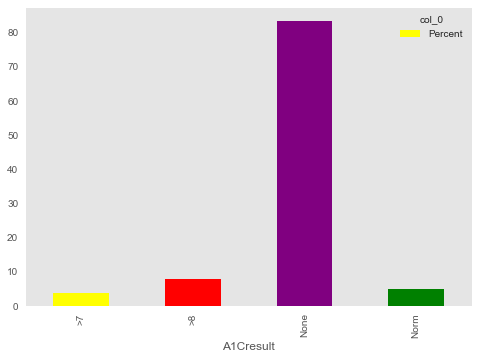

In [121]:
#distribution of A1Cresult
A1Cresult_percentage = pd.crosstab(index = diab["A1Cresult"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0)

A1Cresult_percentage.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
A1Cresult_percentage

readmitted          <30    >30     NO
A1Cresult change                     
>7        Ch      10.39  36.43  53.18
          No       9.70  31.70  58.60
>8        Ch      10.24  35.69  54.07
          No       9.17  34.60  56.23
None      Ch      12.23  36.91  50.86
          No      10.78  33.66  55.56
Norm      Ch       9.97  36.63  53.40
          No       9.41  28.41  62.18

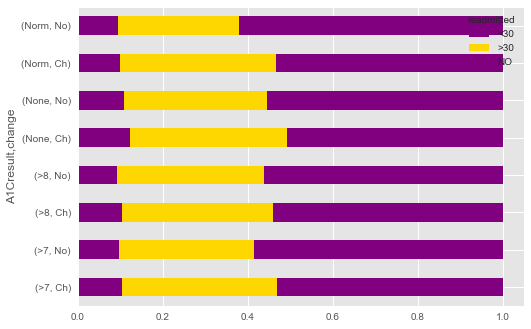

In [122]:
#count readmitted accordint to A1Cresult
A1Cresult_counts = pd.crosstab([diab['A1Cresult'],diab['change']], 
                              diab.readmitted)

# divide the counts to get rates
A1Cresult_rate = A1Cresult_counts.div(A1Cresult_counts.sum(1).astype(float),axis=0)
A1Cresult_rate.plot(kind='barh', 
                   stacked=True,color=['purple','gold'])
#percentage readmitted
round(A1Cresult_rate*100,2)

readmitted,<30,>30,NO
diag_1_cat,,,
Circulatory,11.45,35.61,52.94
Diabeties,12.98,37.89,49.13
Digestive,10.71,35.50,53.78
Genitourinary,10.85,33.54,55.62
Injury,12.25,32.08,55.68
Musculoskeletal,9.50,29.68,60.82
Neoplasms,10.69,32.33,56.97
No diagnosis,23.81,19.05,57.14
Other,12.37,32.86,54.76


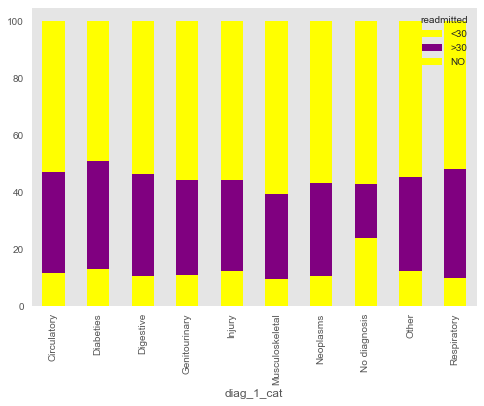

In [123]:
#if the primary diagnosis influence on readmittance
#count readmitted accordint to diag_1_cat
diag1_percentage = pd.crosstab(diab['diag_1_cat'], 
                              diab.readmitted).apply(lambda r: r/r.sum()*100, axis=1)
diag1_percentage.plot(kind='bar', stacked=True, color=['yellow','purple'], grid=False)
round(diag1_percentage,2)



readmitted                           <30        >30         NO
diag_1_cat diabetesMed change                                 
False      No          No       9.285585  30.337740  60.376675
           Yes         Ch      11.695739  36.655228  51.649033
                       No      11.261526  35.031253  53.707221
True       No          No      14.828897  40.000000  45.171103
           Yes         Ch      12.878938  37.447989  49.673073
                       No      12.192067  37.661795  50.146138

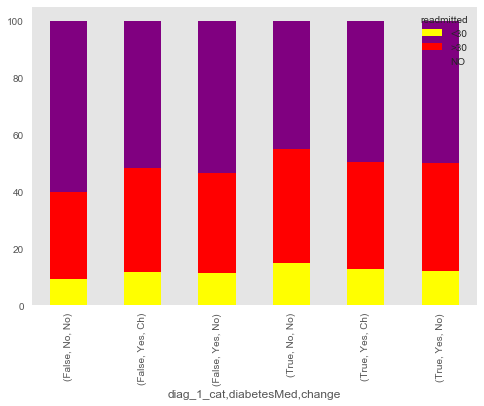

In [124]:
#will try to catch newly diagnosed diabetis. Newly diagnosed shall have primary diagnosis "diabeties", shall have prescribed 
#diabetis medication and shouldn't have change in therapY (because not therapy was before)
diabPrescr_percents = pd.crosstab([diab['diag_1_cat']=="Diabeties",diab["diabetesMed"],diab["change"]],
                           diab.readmitted).apply(lambda r: r/r.sum()*100, axis=1)
diabPrescr_percents.plot(kind='bar', stacked=True, color=['yellow','red','purple'], grid=False) 
diabPrescr_percents
#apparently this combination isn't strongest predictor of readmittance#age and readmittance
age_percents = pd.crosstab([diab['age'],diab["gender"]], diab.readmitted).apply(lambda r: r/r.sum()*100, axis=0)
age_percents.plot(kind='bar', stacked=True, color=['yellow','red'], grid=False) 
#we can see that females tend to get into hospital more often then man. Also, the younger the person, the less chance
#to be readmitted into the hospital. Also, the biggest group of the patients in a hospital is in age 70-80

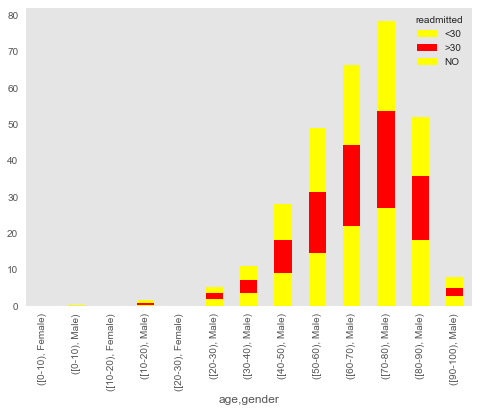

In [125]:
#age and readmittance
age_percents = pd.crosstab([diab['age'],diab["gender"]], diab.readmitted).apply(lambda r: r/r.sum()*100, axis=0)
age_percents.plot(kind='bar', stacked=True, color=['yellow','red'], grid=False) 
#we can see that females tend to get into hospital more often then man. Also, the younger the person, the less chance
#to be readmitted into the hospital. Also, the biggest group of the patients in a hospital is in age 70-80

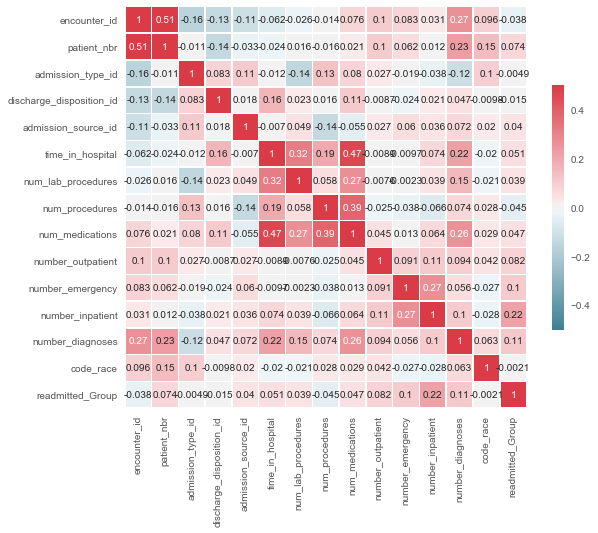

In [126]:
f, ax = plt.subplots(figsize=(9, 9))
#want to see correlation between readmitted and other variables. Correlation is weak with the strongest correlation of
#0.17 for number_inpatient
sns.heatmap(diab.corr(), cmap=cmap, annot=True, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

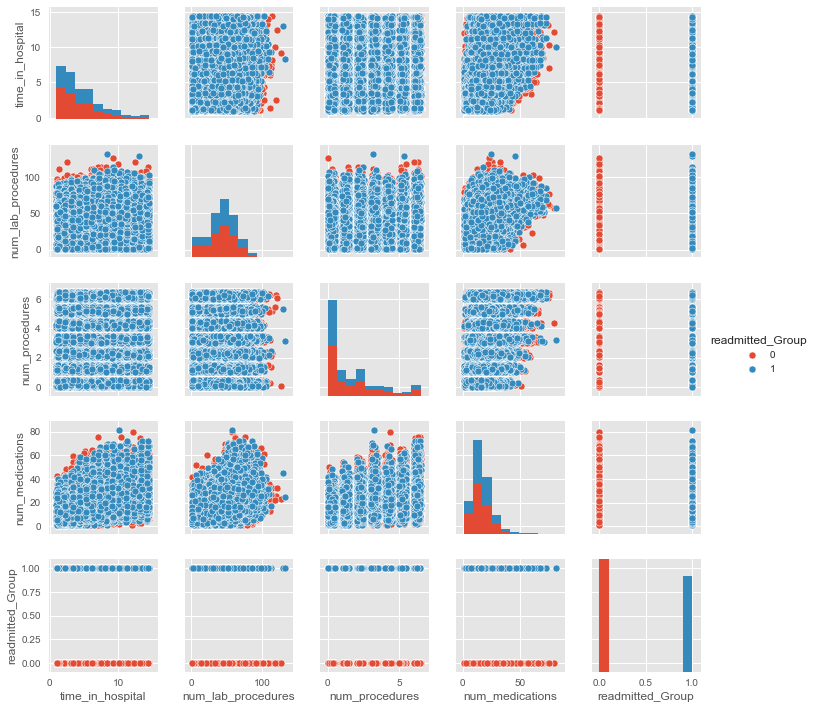

In [127]:
diab_jitter = diab[['time_in_hospital','num_lab_procedures','num_procedures','num_medications',"readmitted_Group"]].copy()
diab_jitter[['time_in_hospital','num_lab_procedures','num_procedures','num_medications']] = diab_jitter[[
        'time_in_hospital','num_lab_procedures','num_procedures','num_medications']].values + np.random.rand(len(diab_jitter),4)/2 
sns.pairplot(diab_jitter, hue="readmitted_Group", size=2)

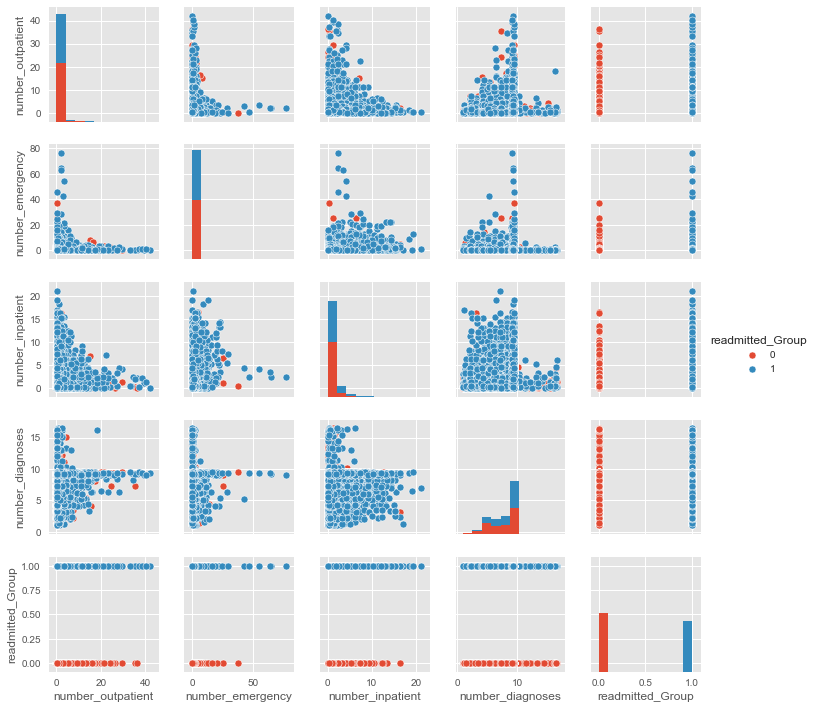

In [128]:
diab_jitter = diab[['number_outpatient','number_emergency','number_inpatient','number_diagnoses',"readmitted_Group"]].copy()
diab_jitter[['number_outpatient','number_emergency','number_inpatient','number_diagnoses']] = diab_jitter[[
        'number_outpatient','number_emergency','number_inpatient','number_diagnoses']].values + np.random.rand(len(diab_jitter),4)/2 
sns.pairplot(diab_jitter, hue="readmitted_Group", size=2)

col_0,Percent
med_cat,
Insulin,53.44
Other,46.56


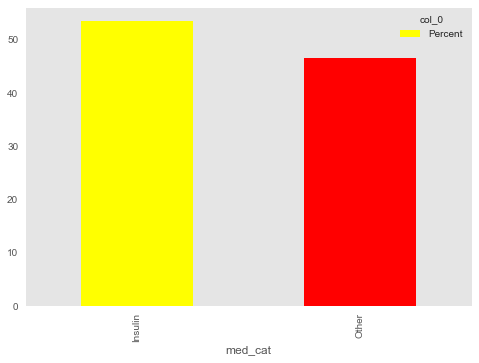

In [129]:
diab["med_cat"]="Other"
diab["med_cat"][(diab["insulin"]=="Up")|(diab["insulin"]=="Down")|(diab["insulin"]=="Steady")]="Insulin"
medication=pd.crosstab(index=diab["med_cat"],columns="Percent").apply(lambda r: round(r/r.sum()*100,2), axis=0)
medication.plot(kind='bar', stacked=True, color=['yellow','red'], grid=False) 
medication

readmitted,<30,>30,NO
med_cat,,,
Insulin,12.14,36.03,51.83
Other,10.04,33.66,56.30


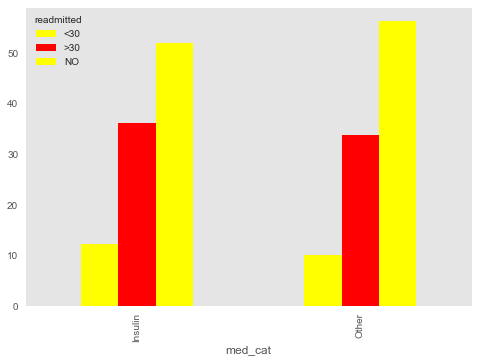

In [130]:
medication=pd.crosstab(diab["med_cat"],diab["readmitted"]).apply(lambda r: round(r/r.sum()*100,2), axis=1)
medication.plot(kind='bar', stacked=False, color=['yellow','red'], grid=False) 
medication

#### Variable transformation
After data exploratory phase, we decided to created additional columns that may be useful for the next phase of analysis.

1, we created a med_increase variable to denote if the medication given was increased during the visit.

In [47]:
pd.options.mode.chained_assignment = None #supress warnings
diab['med_increase']=0
#then make readmittance binary variable
diab['med_increase'][(diab['metformin']=="Up")|(diab['repaglinide']=="Up")|(diab['nateglinide']=="Up")
                    |(diab['glimepiride-pioglitazone']=="Up")|(diab['metformin-rosiglitazone']=="Up")
                     |(diab['metformin-pioglitazone']=="Up")|(diab['chlorpropamide']=="Up")|(diab['glimepiride']=="Up")
                     |(diab['acetohexamide']=="Up")|(diab['glipizide']=="Up")|(diab['glyburide']=="Up")
                     |(diab['tolbutamide']=="Up")|(diab['pioglitazone']=="Up")|(diab['rosiglitazone']=="Up")
                     |(diab['acarbose']=="Up")|(diab['miglitol']=="Up")|(diab['troglitazone']=="Up")|(diab['tolazamide']=="Up")
                    |(diab['examide']=="Up")|(diab['citoglipton']=="Up")|(diab['insulin']=="Up")
                    |(diab['glyburide-metformin']=="Up")|(diab['glipizide-metformin']=="Up")] =1



#### Exceptional work: Principal component analysis
implement dimensionality reduction, then visualize and interpret the results

Using PCA technique, we grouped all the numeric variables and performed Principal component analysis on the data. 



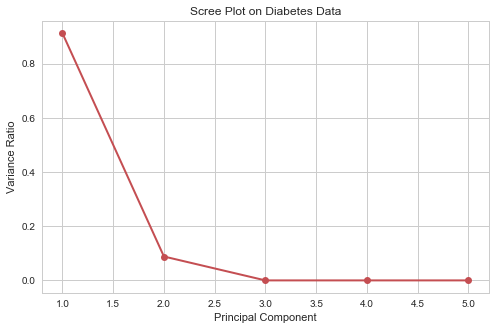

In [74]:
#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(diab)

#Create Numeric Only Dataframe
diabInt64 = dfDataTypes.select_dtypes(['int64'])

components = 5

pca = PCA( n_components= components)

#Run PCA
diabPCA_pca = pca.fit(diabInt64).transform(diabInt64) # fit data and then transform it

variance_ratio = pca.explained_variance_ratio_


#Run PCA
fig = plt.figure(figsize=(8,5))
CompentValues = np.arange(components) + 1
plt.plot(CompentValues, variance_ratio, 'ro-', linewidth=2)
plt.title('Scree Plot on Diabetes Data')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

Based on cree plot graphical analysis, the optimal PCA components should be 3.